In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from utils import utils
from numpy import linalg as LA

In [2]:
def main(image):
    # The point in the model's coordinate system(cm)
    P_M = np.array([[-5,5,5,-5],
                    [-5,-5,5,5],
                    [0,0,0,0],
                    [1,1,1,1]])

    # Define camera parameters
    f = 504
    cx = 320
    cy = 240

    # intrinsic parameter matrix
    K = np.array([[f,0,cx],
                  [0,f,cy],
                  [0,0,1]])

    # Make an initial guess of the pose 
    x0 = np.array([[0],[0],[0],[0],[0],[23]])

    # Find the position of points on the image
    position = utils.image_position(image)

    y = np.zeros(shape = (8,1))

    y[0] = position[0,0]
    y[1] = position[0,1] 
    y[2] = position[1,0] 
    y[3] = position[1,1] 
    y[4] = position[2,0] 
    y[5] = position[2,1] 
    y[6] = position[3,0] 
    y[7] = position[3,1] 

    dy, x = utils.leastSquareFit(x0, P_M, K, y)

    # x[0] = np.rad2deg(x[0])
    # x[1] = np.rad2deg(x[1])
    # x[2] = np.rad2deg(x[2])

    W = np.amax(P_M, axis=1) - np.amin(P_M, axis=1)
    W = LA.norm(W)

    u0 = utils.fProject(x, [[0], [0], [0], [1]], K)
    uX = utils.fProject(x, [[W], [0], [0], [1]], K)
    uY = utils.fProject(x, [[0], [W], [0], [1]], K)
    uZ = utils.fProject(x, [[0], [0], [W], [1]], K)

    cv2.line(image, (u0[0], u0[1]), (uX[0], uX[1]), (0,0,255), 8)
    cv2.line(image, (u0[0], u0[1]), (uY[0], uY[1]), (0,255,0), 8)
    cv2.line(image, (u0[0], u0[1]), (uZ[0], uZ[1]), (255,0,0), 8)

    x[0] = np.rad2deg(x[0])
    x[1] = np.rad2deg(x[1])
    x[2] = np.rad2deg(x[2])

#     plt.figure()
#     image = image[:,:,::-1]
#     plt.imshow(image)
#     print(x)
    return image

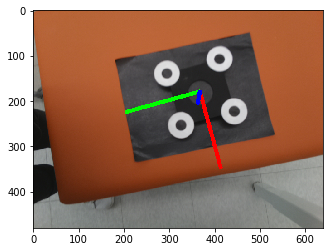

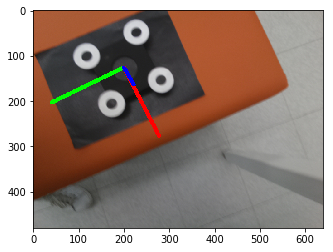

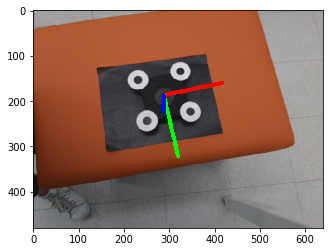

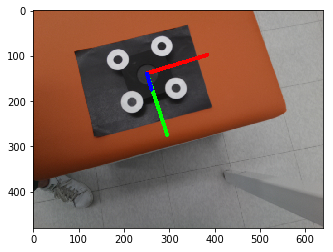

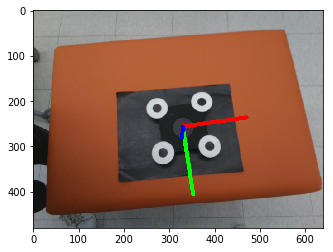

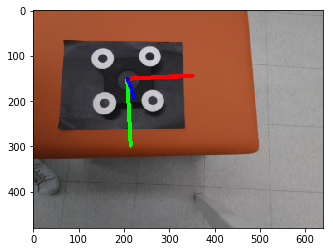

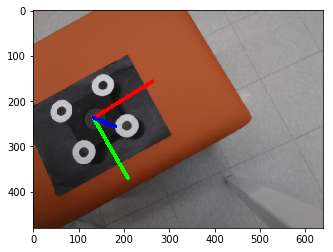

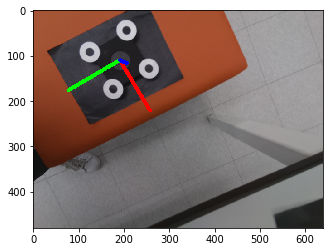

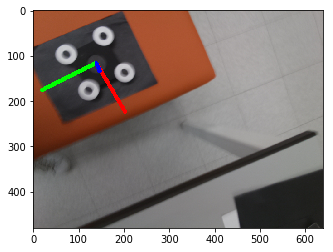

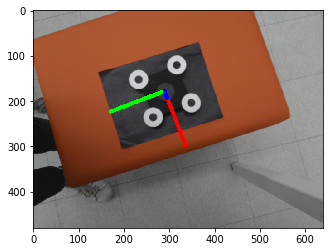

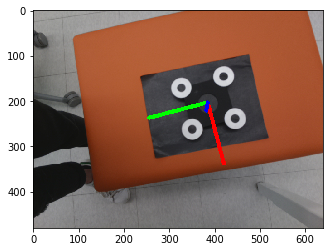

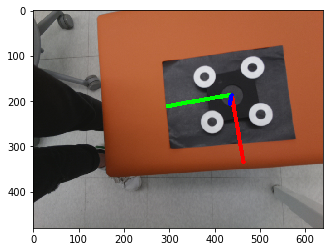

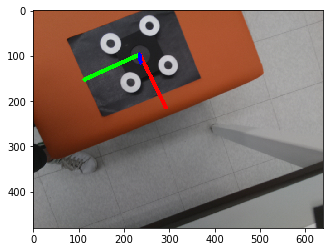

In [4]:
for i in range(0,14):
    try:
        image = cv2.imread('image/image{}.jpg'.format(i))
        image = main(image)
        image = image[:,:,::-1]
        plt.figure()
        plt.imshow(image)
    except:
        pass
